In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2.csv')
df.shape

(6774, 2)

In [4]:
df.head()

,Time,domain
0,2022-01-20 18:01:40,www.google.com
1,2022-01-20 18:01:55,mail.google.com
2,2022-01-20 18:01:59,umbc.webex.com
3,2022-01-20 18:02:26,umbc.webex.com
4,2022-01-20 19:21:53,umbc.webex.com


In [5]:
df.tail()

,Time,domain
6769,2022-04-18 14:38:15,manivannan-ai.medium.com
6770,2022-04-18 14:38:16,my.umbc.edu
6771,2022-04-18 14:38:18,mail.google.com
6772,2022-04-18 14:38:21,www.google.com
6773,2022-04-18 14:38:29,browser-history.readthedocs.io


In [6]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [8]:
df.dropna( inplace=True)

In [9]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [11]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [13]:
df['Time'] = pd.to_datetime(df['Time'])

In [15]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [17]:
df.head()

,Time,domain
0,2022-01-20 18:01:40,www.google.com
1,2022-01-20 18:01:55,mail.google.com
2,2022-01-20 18:01:59,umbc.webex.com
3,2022-01-20 18:02:26,umbc.webex.com
4,2022-01-20 19:21:53,umbc.webex.com


In [19]:
df['domain'].value_counts()[:50]

www.google.com                          1774
github.com                              1056
colab.research.google.com                668
webauth.umbc.edu                         667
blackboard.umbc.edu                      288
umbc-csm.symplicity.com                  263
my.umbc.edu                              215
localhost:8888                           136
www.w3schools.com                        124
myretrievercare.umbc.edu                 118
my3.my.umbc.edu                          105
csprd-web.ps.umbc.edu                     69
meet181.webex.com                         59
datasetsearch.research.google.com         55
umbc.app.box.com                          54
umbc.webex.com                            46
s3.amazonaws.com                          44
stackoverflow.com                         41
accounts.google.com                       37
www.pdbmbook.com                          36
faker.readthedocs.io                      31
catalog.data.gov                          30
campuscard

<AxesSubplot:>

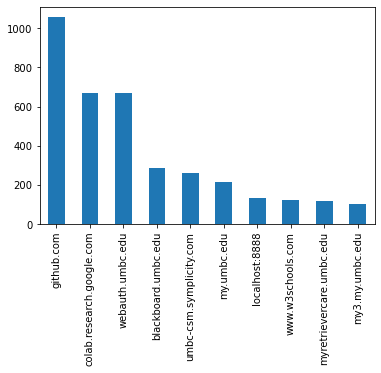

In [21]:
# top 10 sites that I visisted
df['domain'].value_counts()[1:11].plot(kind='bar')

In [23]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     389
1      62
2      31
3      46
4      55
5      46
9      52
10    175
11    128
12    233
13    366
14    353
15    568
16    463
17    474
18    300
19    768
20    683
21    598
22    505
23    479
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

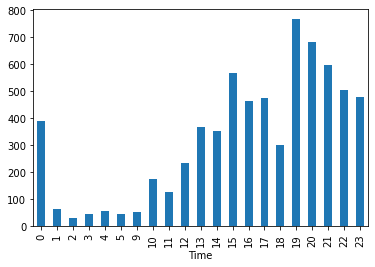

In [25]:
hourly_counts.plot.bar()

In [27]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-20 18:01:40,www.google.com,Thursday,3
1,2022-01-20 18:01:55,mail.google.com,Thursday,3
2,2022-01-20 18:01:59,umbc.webex.com,Thursday,3
3,2022-01-20 18:02:26,umbc.webex.com,Thursday,3
4,2022-01-20 19:21:53,umbc.webex.com,Thursday,3


In [29]:
df['Day'].value_counts()

Tuesday      2353
Monday       1489
Thursday      918
Friday        723
Wednesday     567
Saturday      484
Sunday        240
Name: Day, dtype: int64

In [31]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1489
1    2353
2     567
3     918
4     723
5     484
6     240
Name: DayIndex, dtype: int64

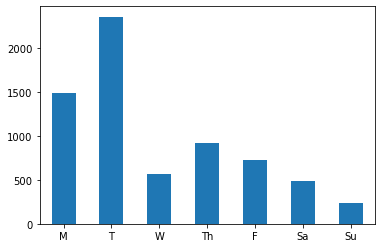

In [33]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [35]:
#most used domains on wednesdays
list = df.loc[df['Day'] == 'Wednesday', 'domain']
#list.value_counts()[:10]

<AxesSubplot:>

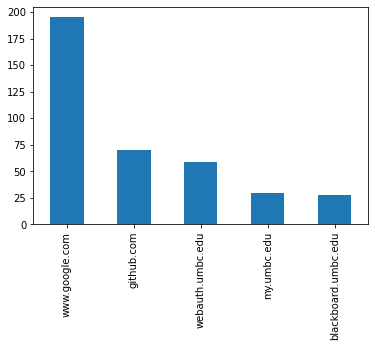

In [36]:
list = list.value_counts()[0:5]
list.plot.bar()

In [37]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-20 18:01:40,www.google.com,Thursday,3,False
1,2022-01-20 18:01:55,mail.google.com,Thursday,3,False
2,2022-01-20 18:01:59,umbc.webex.com,Thursday,3,False
3,2022-01-20 18:02:26,umbc.webex.com,Thursday,3,False
4,2022-01-20 19:21:53,umbc.webex.com,Thursday,3,False


In [39]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [40]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
1006,2022-02-12 09:14:21,blackboard.umbc.edu,Saturday,5,True
1497,2022-02-19 00:04:48,colab.research.google.com,Saturday,5,True
1498,2022-02-19 00:06:24,my.umbc.edu,Saturday,5,True
1499,2022-02-19 00:06:29,my.umbc.edu,Saturday,5,True
1500,2022-02-19 00:06:35,webauth.umbc.edu,Saturday,5,True


In [41]:
weekday['domain'].value_counts()[:5]

www.google.com               1653
github.com                    769
webauth.umbc.edu              597
colab.research.google.com     568
umbc-csm.symplicity.com       256
Name: domain, dtype: int64

In [42]:
weekend['domain'].value_counts()[:5]

github.com                   287
www.google.com               121
colab.research.google.com    100
webauth.umbc.edu              70
blackboard.umbc.edu           45
Name: domain, dtype: int64

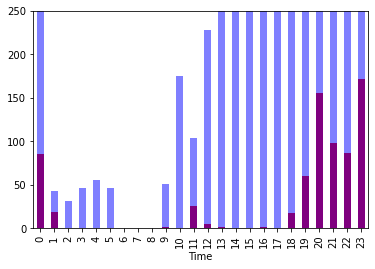

In [43]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 250])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)

In [44]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

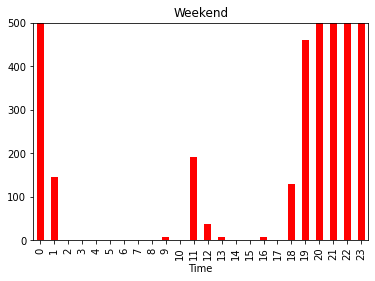

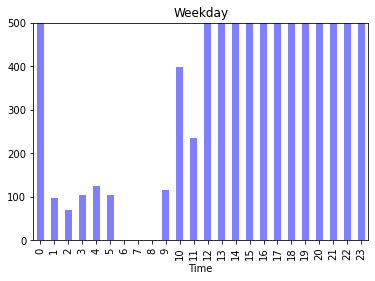

In [45]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 500]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [46]:
df['domain'].value_counts()[:50]

www.google.com                          1774
github.com                              1056
colab.research.google.com                668
webauth.umbc.edu                         667
blackboard.umbc.edu                      288
umbc-csm.symplicity.com                  263
my.umbc.edu                              215
localhost:8888                           136
www.w3schools.com                        124
myretrievercare.umbc.edu                 118
my3.my.umbc.edu                          105
csprd-web.ps.umbc.edu                     69
meet181.webex.com                         59
datasetsearch.research.google.com         55
umbc.app.box.com                          54
umbc.webex.com                            46
s3.amazonaws.com                          44
stackoverflow.com                         41
accounts.google.com                       37
www.pdbmbook.com                          36
faker.readthedocs.io                      31
catalog.data.gov                          30
campuscard

In [47]:
df['domain'] = df['domain'].astype(str)

In [48]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

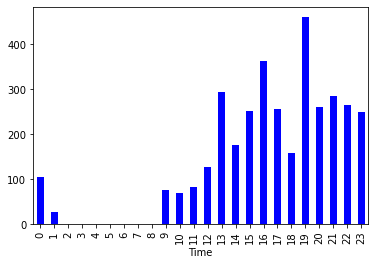

In [49]:
_= show_domain_stats('umbc', 'blue')

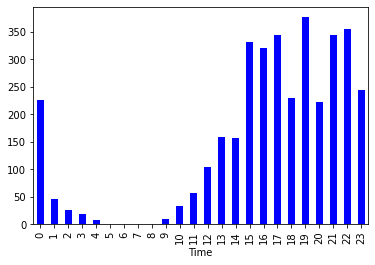

In [50]:
_= show_domain_stats('www.google.com', 'blue')

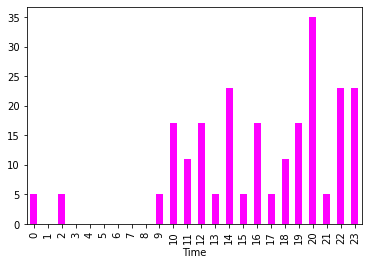

In [51]:
_ = show_domain_stats('stackover', 'magenta')

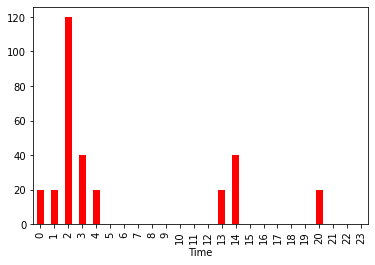

In [52]:
_ = show_domain_stats('youtube', 'red')

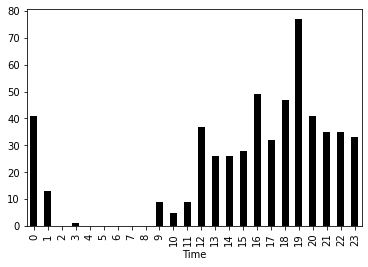

In [53]:
_=show_domain_stats('blackboard', 'black')

# Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
2. Is he employed?
3. What is his interests?
4. Anything interesting?

answer here

1. This looks like the users personal computer as the top 10 browsing history shows all the academic websites. This also suggests that the user can be a student. 
2. The user mostly looks like a student.
3. The intrest of the person is mostly academic and specifically technical. 
4. The person uses this his/her  personal academic laptop. The user is mostly a student and is always looking for technical solution. The user is also looking for a job which is suggested by browsing linkdin and career websites.



